In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

### $S = - \sum _ { \mathrm { n } } p _ { \mathrm { n } } \log _ { 2 } p _ { \mathrm { n } } = S _ { \mathrm { continuum } } - D \log _ { 2 } ( \Delta x )$

### $S _ { \text { continuum } } = - \int d x P ( x ) \log _ { 2 } P ( x )$

In [13]:
N = 10**4  #positions
xx = np.random.rand(N)*2-1  #randon number
yy = (1-xx**2)**0.5  #falling on the circle
sign = np.random.choice((-1,1),N)

xx = xx*sign  #random signs
yy = yy*sign

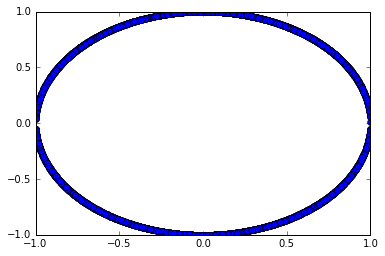

In [14]:
plt.plot(xx,yy,'o')

In [51]:
dx = 0.01
xs = np.arange(-2,2+1,dx)
H, xedges, yedges = np.histogram2d(xx,yy,bins=(xs,xs))

In [52]:
Pxy = (H+10**-10)/N
D = 2
S = -np.dot( Pxy.reshape(-1), np.log2(Pxy.reshape(-1)) ) - D*np.log2(dx)
print('Entropy=',S)

Entropy= 22.48238607647616


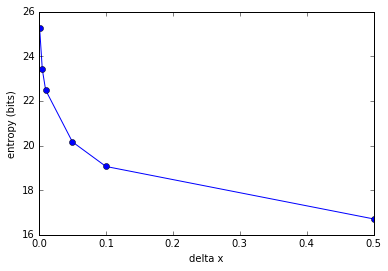

In [53]:
###scanning bin size
dxs = np.array([0.001,0.005,0.01,0.05,0.1,0.5])
Ss = []
for i in dxs:
    xs = np.arange(-2,2+1,i)
    H, xedges, yedges = np.histogram2d(xx,yy,bins=(xs,xs))
    Pxy = (H+10**-10)/N
    S = -np.dot( Pxy.reshape(-1), np.log2(Pxy.reshape(-1)) ) - D*np.log2(dx)
    Ss.append(S)

plt.plot(dxs,Ss,'-o')
plt.xlabel('delta x')
plt.ylabel('entropy (bits)')

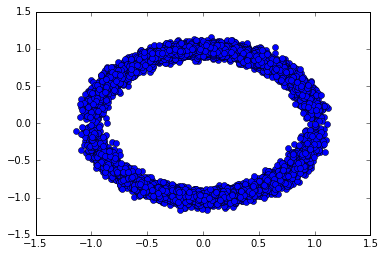

In [54]:
###with noise
sig = 0.05
noisex = np.random.randn(N)*sig
noisey = np.random.randn(N)*sig
xn = xx+noisex
yn = yy+noisey
plt.plot(xn,yn,'o')

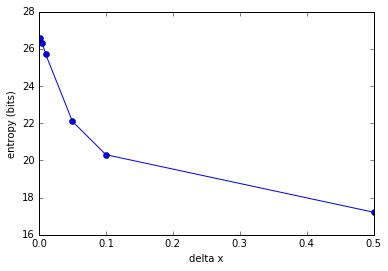

In [55]:
dxs = np.array([0.001,0.005,0.01,0.05,0.1,0.5])
Ss = []
for i in dxs:
    xs = np.arange(-2,2+1,i)
    H, xedges, yedges = np.histogram2d(xn,yn,bins=(xs,xs))
    Pxy = (H+10**-10)/N
    S = -np.dot( Pxy.reshape(-1), np.log2(Pxy.reshape(-1)) ) - D*np.log2(dx)
    Ss.append(S)

plt.plot(dxs,Ss,'-o')
plt.xlabel('delta x')
plt.ylabel('entropy (bits)')

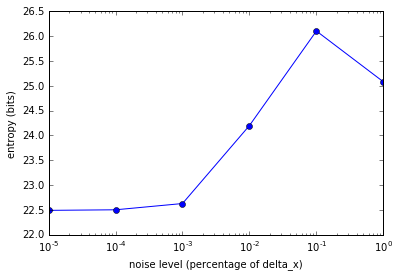

In [58]:
###transition of noise level
dx = 0.01
sigs = dx*np.array([0.001,0.01,0.1,1,10,100])
Ss = []
for s in sigs:
    noisex = np.random.randn(N)*s
    noisey = np.random.randn(N)*s
    xn = xx+noisex
    yn = yy+noisey
    xs = np.arange(-2,2+1,dx)
    H, xedges, yedges = np.histogram2d(xn,yn,bins=(xs,xs))
    Pxy = (H+10**-10)/N
    S = -np.dot( Pxy.reshape(-1), np.log2(Pxy.reshape(-1)) ) - D*np.log2(dx)
    Ss.append(S)
    
plt.semilogx(sigs,Ss,'-o')
plt.xlabel('noise level (percentage of delta_x)')
plt.ylabel('entropy (bits)')